In [163]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # filtering warning

In [164]:
data=pd.read_csv("loan_prediction.csv")

In [165]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Duplicate value Check

In [167]:
data.duplicated().sum()

0

# Columns Check

In [169]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# DataType Check

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing Values Find

In [173]:
data.drop(("Loan_ID"),axis=1,inplace=True)

In [174]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# To Fill Missing Values By Using Category

In [176]:
category=data.select_dtypes(include="object")
for i in category:
    print(i)
    print(data[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


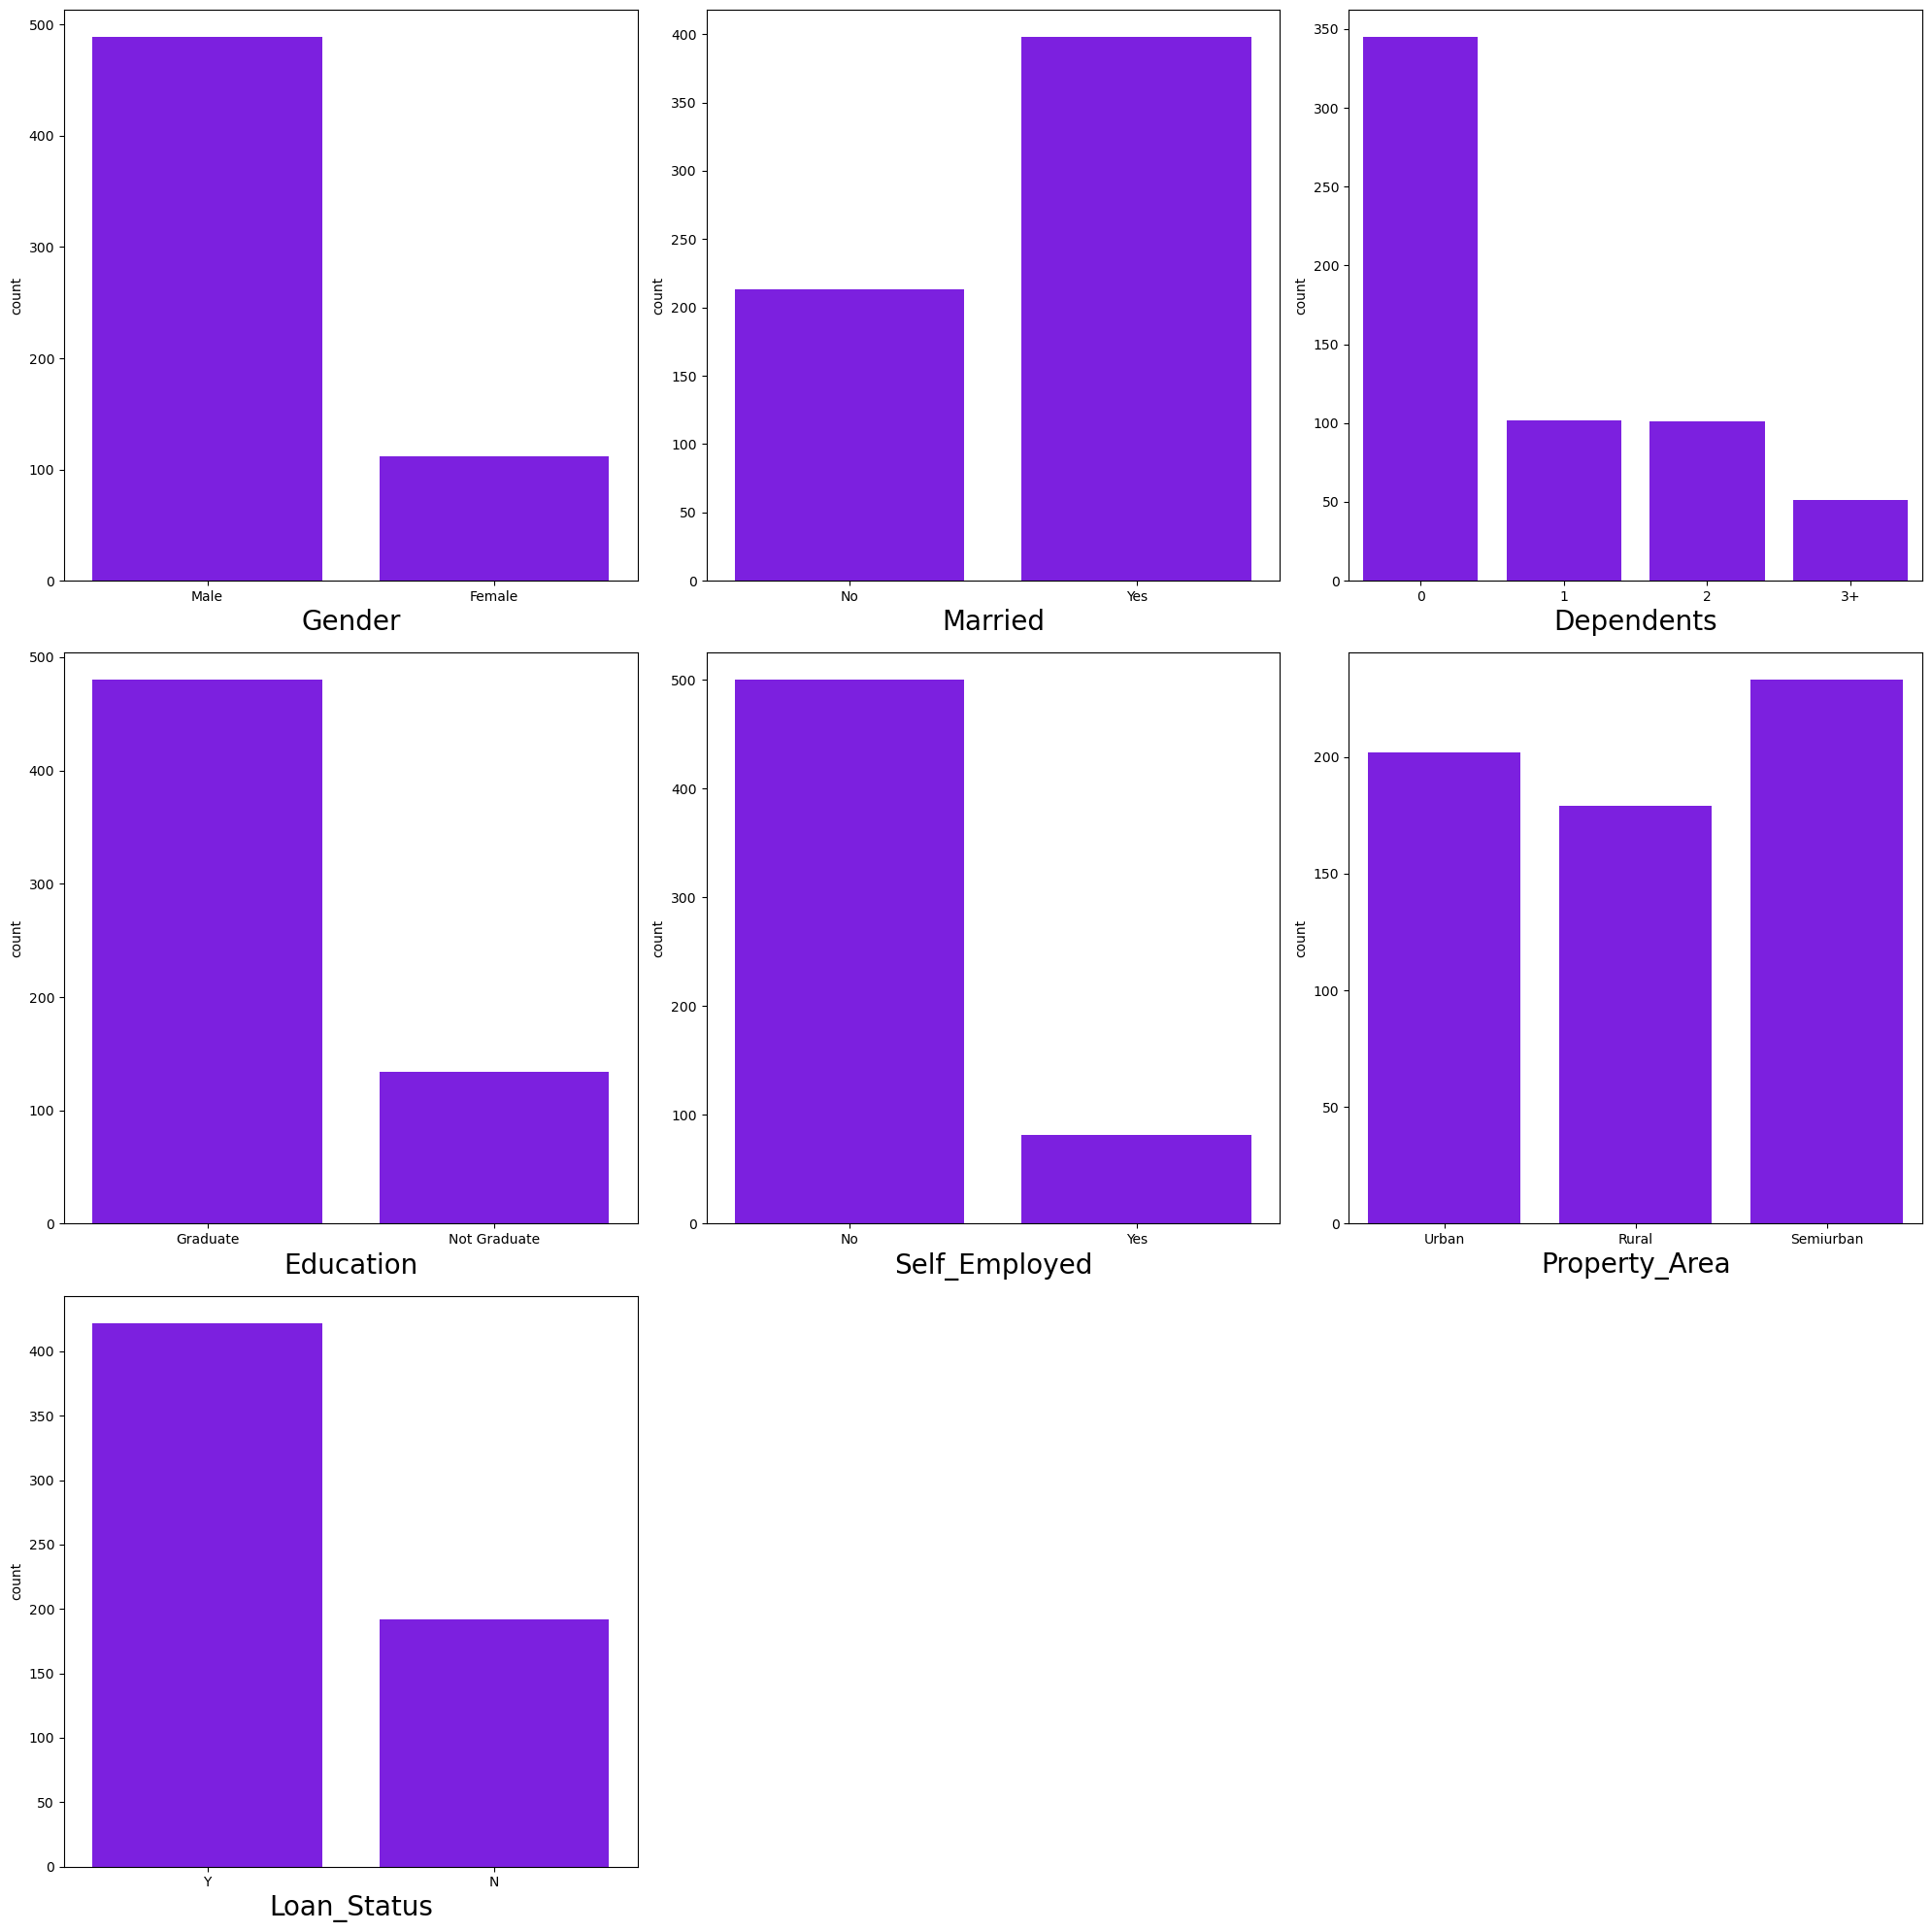

In [177]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in category:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

C:\Users\SAM\AppData\Local\Temp\ipykernel_31124\1913586880.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LoanAmount'],color='b')


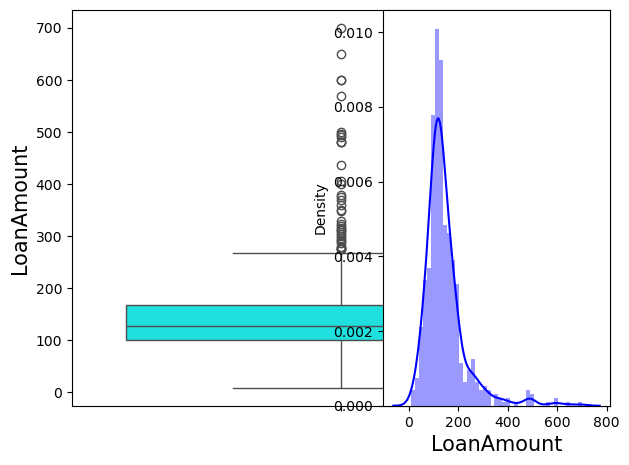

In [178]:
sns.boxplot(y='LoanAmount',data=data,color='cyan')
plt.ylabel('LoanAmount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(data['LoanAmount'],color='b')
plt.xlabel('LoanAmount',fontsize=15)
plt.tight_layout()
plt.show()

In [179]:
print("Mean of Loan Amount:",data['LoanAmount'].mean())
print("Median of Loan Amount:",data['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


# Imputating Missing value with mode for categorical features

In [181]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

C:\Users\SAM\AppData\Local\Temp\ipykernel_31124\3944312528.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
C:\Users\SAM\AppData\Local\Temp\ipykernel_31124\3944312528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [182]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Statical Summary

In [184]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Target Status

In [186]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

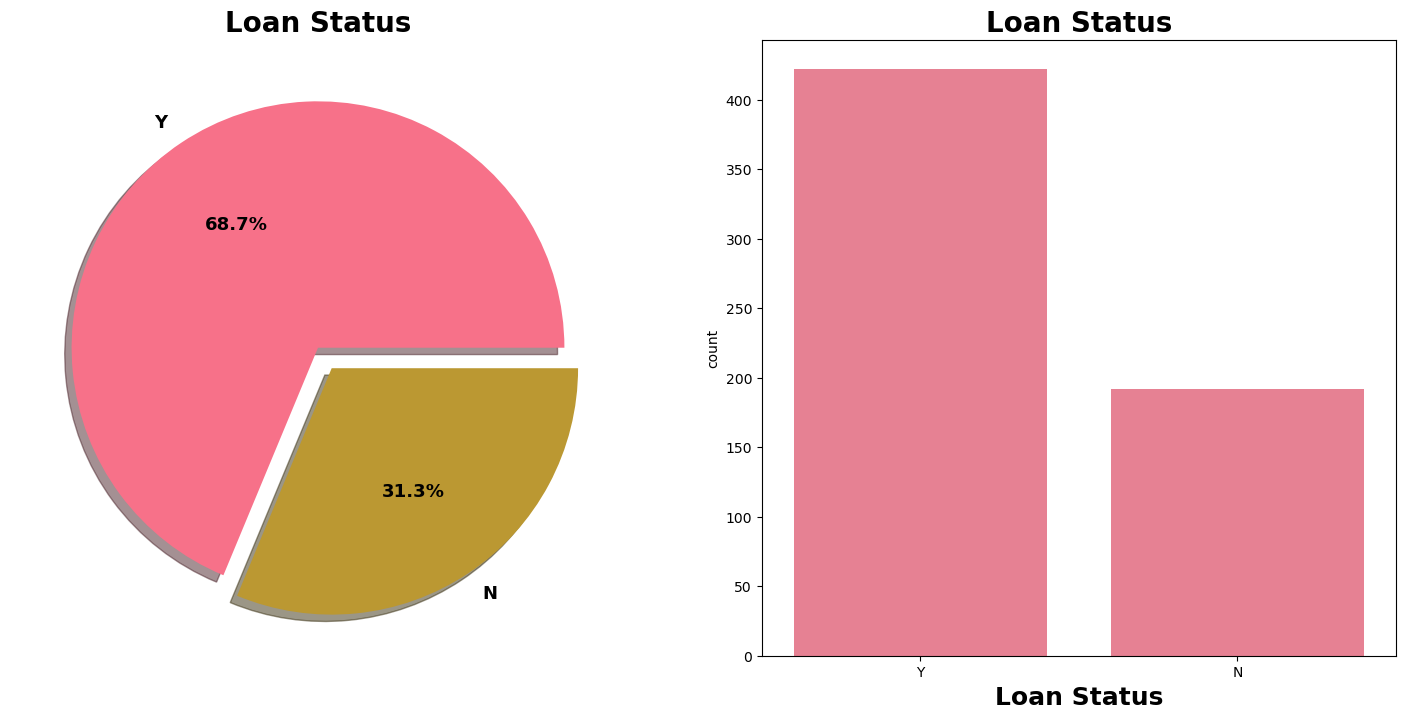

In [187]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                            textprops={'fontweight':'bold','fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Loan Status',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Loan_Status',data=data,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight='bold')
plt.show()

In [188]:
sns.countplot(x='Gender',hue="Loan_Status",data=data,ax=ax[1])

<Axes: title={'center': 'Loan Status'}, xlabel='Loan Status', ylabel='count'>

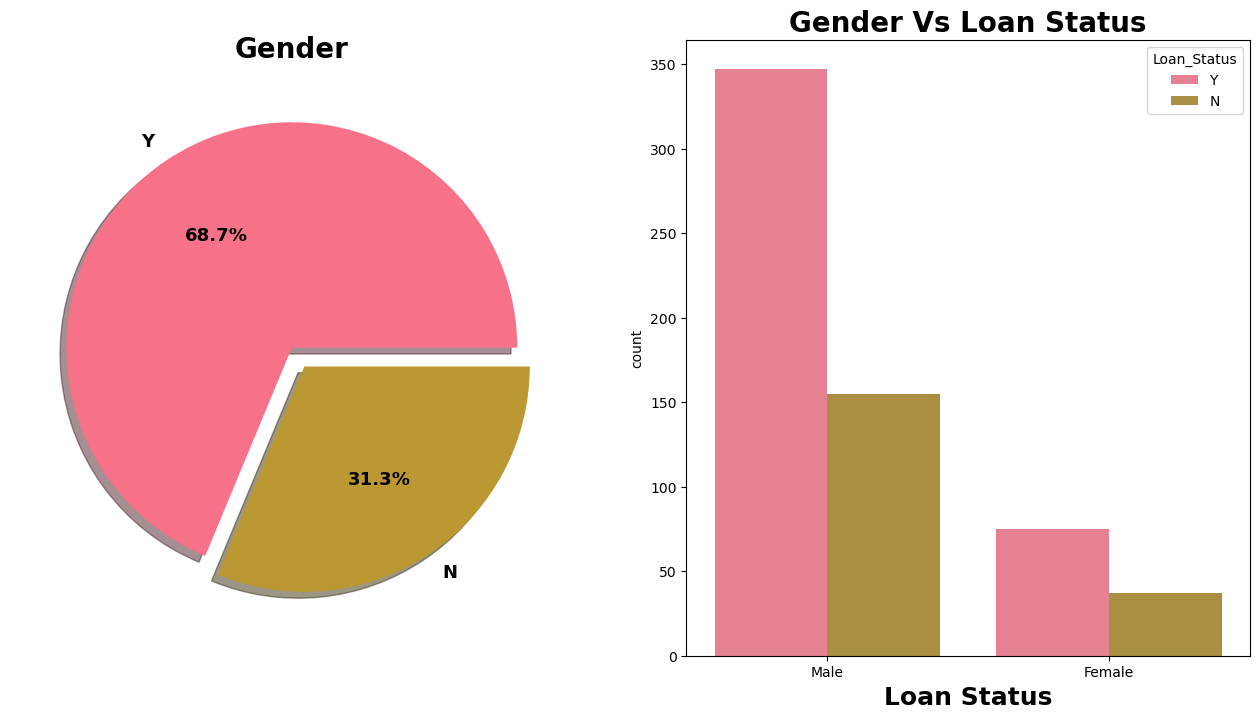

In [189]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                            textprops={'fontweight':'bold','fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Gender',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Gender',hue="Loan_Status",data=data,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight='bold')
plt.show()

In [190]:
pd.crosstab(data['Gender'],data['Loan_Status'],margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


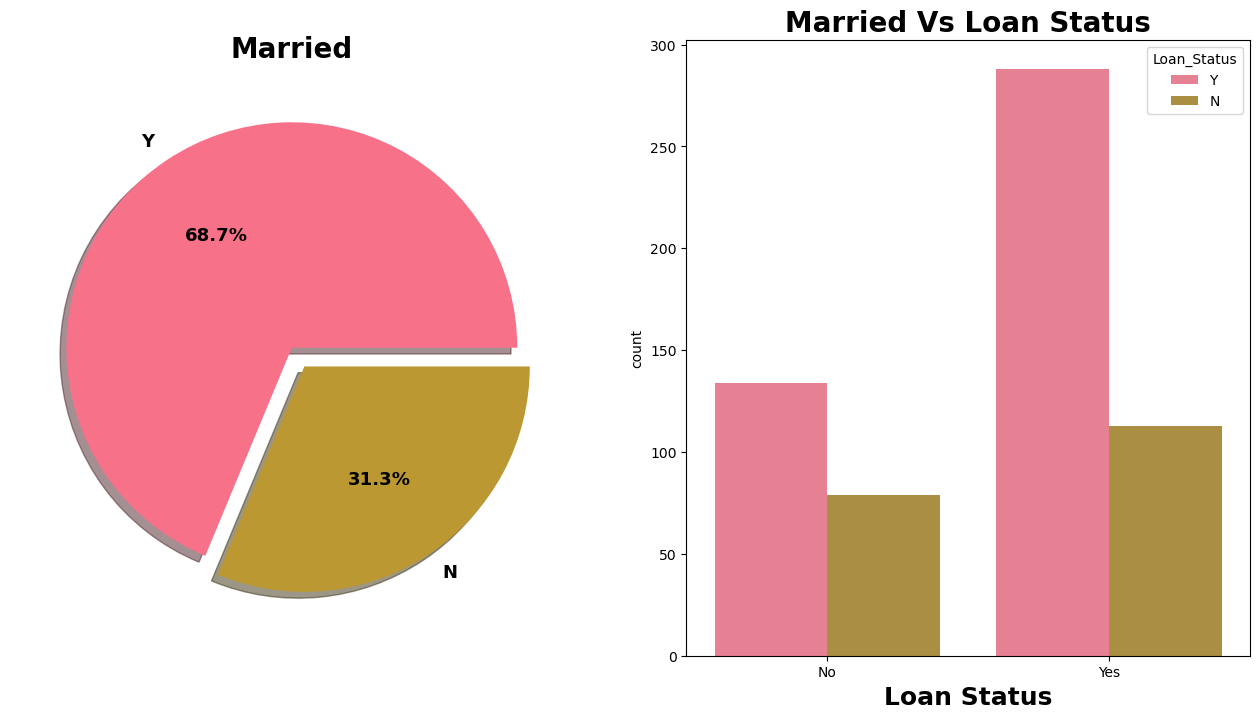

In [191]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                            textprops={'fontweight':'bold','fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Married',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Married',hue="Loan_Status",data=data,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight='bold')
plt.show()

In [192]:
pd.crosstab([data['Gender'],data['Married']],data['Loan_Status'],margins=True).style.background_gradient(cmap='gist_rainbow_r')

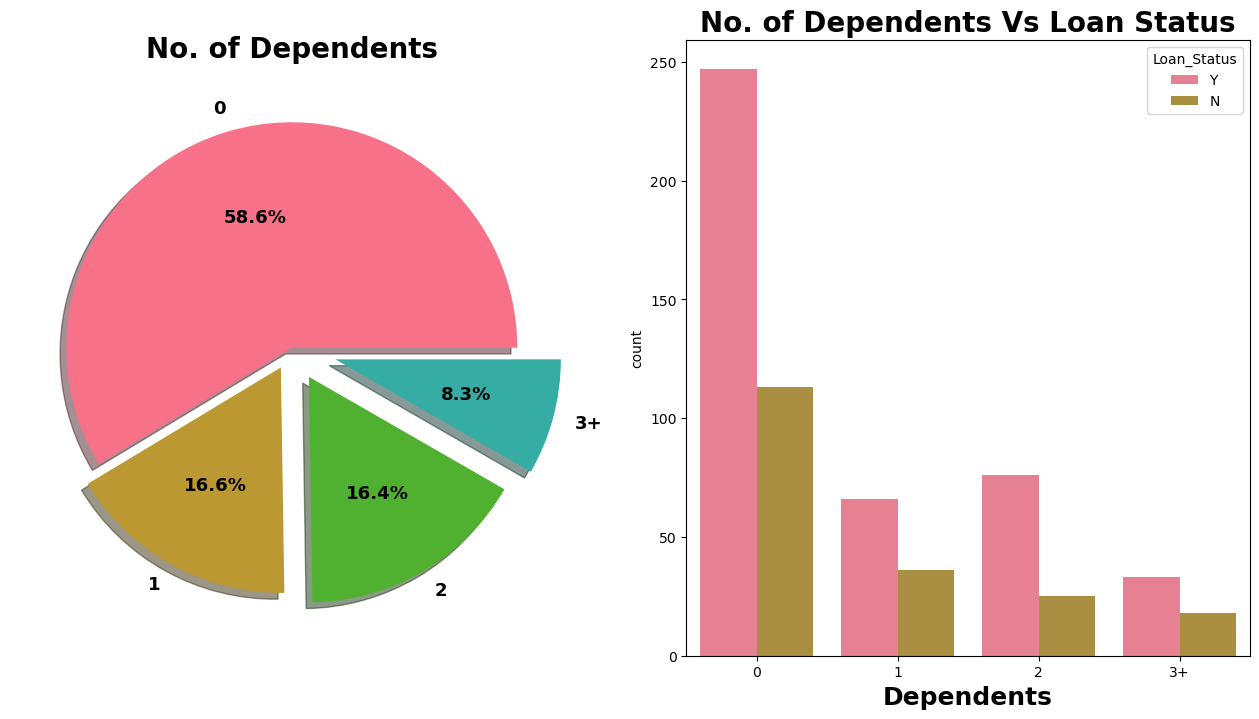

In [193]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                            textprops={'fontweight':'bold','fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Loan_Status",data=data,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight='bold')
plt.show()

In [194]:
pd.crosstab([data['Dependents']],[data.Loan_Status,data['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [196]:
pd.crosstab([data['Dependents'],data['Gender']],[data.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

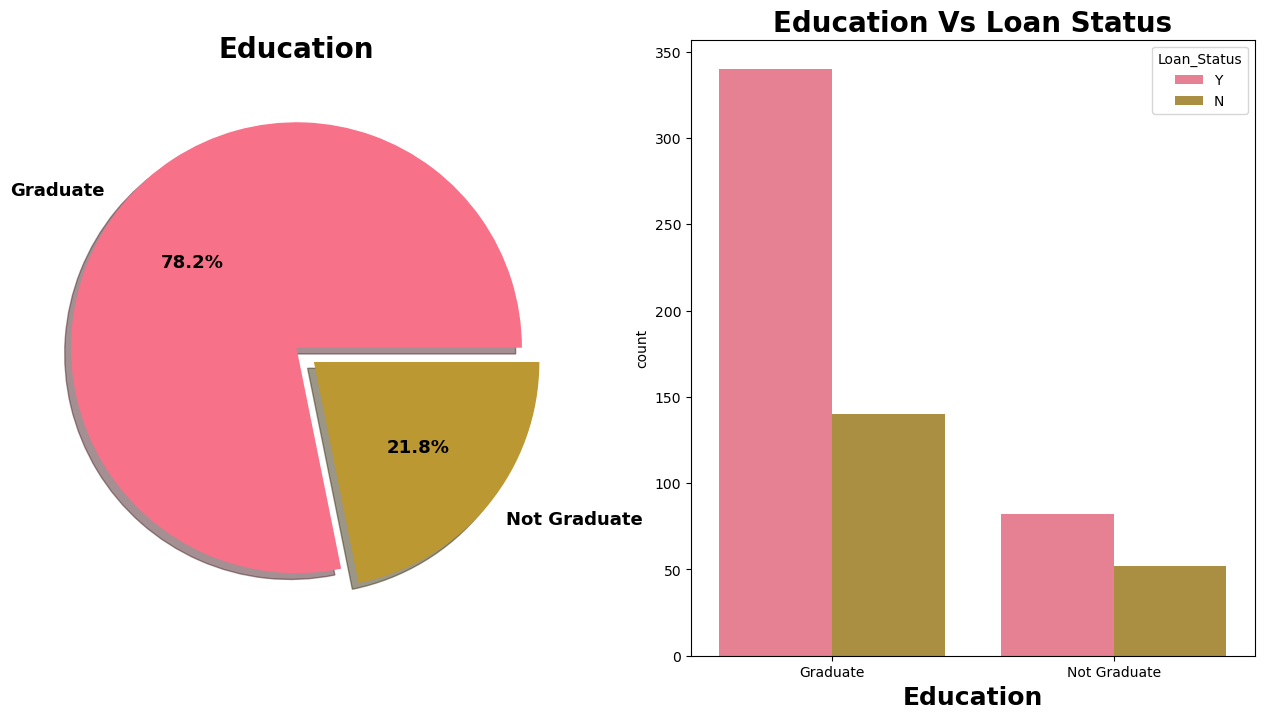

In [198]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                            textprops={'fontweight':'bold','fontsize':13},ax=ax[0],shadow=True)
ax[0].set_title('Education',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='Education',hue="Loan_Status",data=data,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight='bold')
plt.show()

In [200]:
pd.crosstab([data['Education'],data['Gender']],[data.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

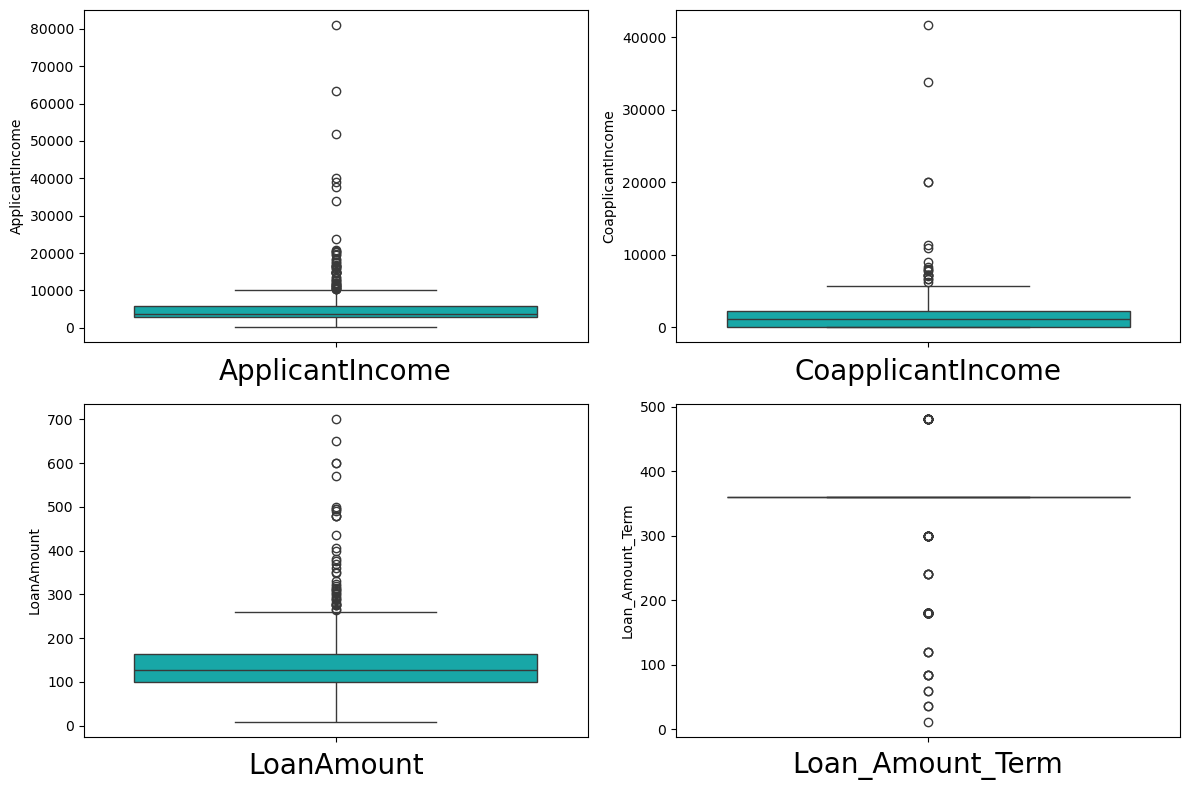

In [204]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1
Numerical=data.select_dtypes(exclude="object")
for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [208]:
pd.crosstab([data['Dependents'],data['Gender']],[data.Loan_Status],margins=True).style.background_gradient(cmap='summer_r')